In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('transactions.csv')
df.sample(5)

,date,category,amount
4224,2024-12-31 08:55:15 +0000,Coffe,12.00
2301,2023-12-09 15:03:02 +0000,Transport,5.00
1815,2023-08-05 13:37:23 +0000,Sport,20.00
822,2023-01-05 16:32:15 +0000,Market,1.44
3407,2024-08-31 12:02:19 +0000,Transport,2.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      4597 non-null   object 
 1   category  4597 non-null   object 
 2   amount    4597 non-null   float64
dtypes: float64(1), object(2)
memory usage: 107.9+ KB


In [4]:
df.describe()

,amount
count,4597.000000
mean,15.591100
std,75.778464
min,0.050000
25%,4.000000
50%,7.100000
75%,11.500000
max,2500.000000


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,category,amount
0,2022-07-06 05:57:10+00:00,Restuarant,5.50
1,2022-07-06 05:57:27+00:00,Market,2.00
2,2022-07-06 05:58:12+00:00,Coffe,30.10
3,2022-07-06 05:58:25+00:00,Market,17.33
4,2022-07-06 05:59:00+00:00,Restuarant,5.50


In [6]:
df

,date,category,amount
0,2022-07-06 05:57:10+00:00,Restuarant,5.50
1,2022-07-06 05:57:27+00:00,Market,2.00
2,2022-07-06 05:58:12+00:00,Coffe,30.10
3,2022-07-06 05:58:25+00:00,Market,17.33
4,2022-07-06 05:59:00+00:00,Restuarant,5.50
...,...,...,...
4592,2025-03-09 18:16:33+00:00,Market,2.88
4593,2025-03-10 02:50:47+00:00,Transport,0.50
4594,2025-03-10 13:25:19+00:00,Transport,0.50
4595,2025-03-10 14:21:57+00:00,Market,7.50


In [7]:
total_income = df[df['amount'] > 0]['amount'].sum()
total_income

np.float64(71672.285)

In [13]:
df['month'] = df['date'].dt.to_period('M')
monthly_expense = df.groupby('month')['amount'].sum()
monthly_expense

C:\Users\SAAD SHAIKH\AppData\Local\Temp\ipykernel_23348\1614173117.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['date'].dt.to_period('M')


month
2022-07    2861.380
2022-08    1307.520
2022-09    1338.480
2022-10    2001.120
2022-11    1017.810
2022-12    1605.530
2023-01    2162.190
2023-02    1540.840
2023-03    2274.610
2023-04    2224.880
2023-05    2599.920
2023-06    1935.360
2023-07    5192.720
2023-08    1123.740
2023-09    1629.950
2023-10    1728.260
2023-11    1428.310
2023-12    1810.440
2024-01    4068.930
2024-02    1250.660
2024-03    1559.180
2024-04    1706.300
2024-05    4021.460
2024-06    2644.020
2024-07    5509.490
2024-08    2194.540
2024-09    3275.320
2024-10    2522.860
2024-11    1772.930
2024-12    1872.710
2025-01    1917.980
2025-02    1147.355
2025-03     425.490
Freq: M, Name: amount, dtype: float64

In [16]:
total_spent = df['amount'].sum()
total_spent

np.float64(71672.285)

In [23]:
daily_spend = df.groupby(df['date'].dt.date)['amount'].sum()
daily_spend.mean()

np.float64(74.97100941422595)

In [26]:
monthly_expense.idxmax(),monthly_expense.max()

(Period('2024-07', 'M'), np.float64(5509.49))

In [34]:
category_expense = df.groupby('category')['amount'].sum()
category_expense.idxmax(),category_expense.max()

('Restuarant', np.float64(12615.54))

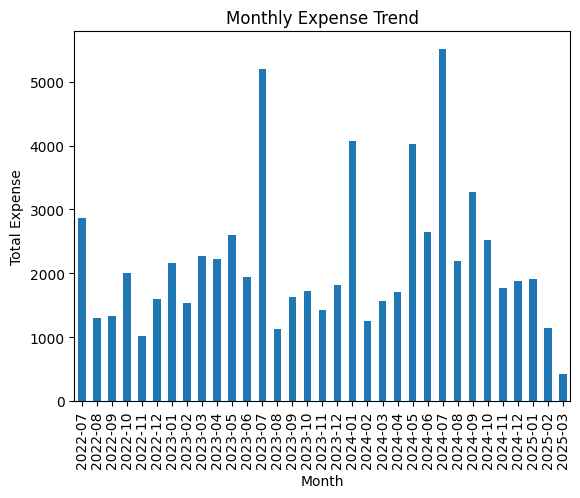

In [38]:
import matplotlib.pyplot as plt
monthly_expense.plot(kind = 'bar')
plt.title('Monthly Expense Trend')
plt.xlabel('Month')
plt.ylabel('Total Expense')
plt.show()

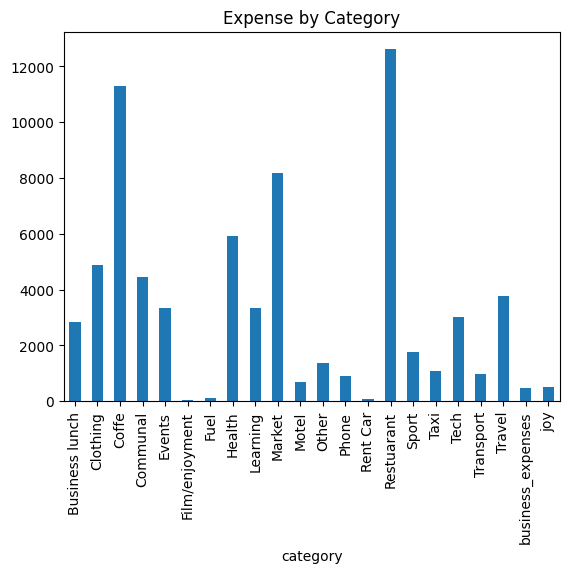

In [40]:
category_expense.plot(kind='bar')
plt.title("Expense by Category")
plt.show()

In [41]:
total_spent = df['amount'].sum()

avg_daily_spend = df.groupby(df['date'].dt.date)['amount'].sum().mean()

worst_month = monthly_expense.idxmax()
worst_month_amount = monthly_expense.max()

top_category = category_expense.idxmax()
top_category_amount = category_expense.max()

total_spent, avg_daily_spend, worst_month, top_category


(np.float64(71672.285),
 np.float64(74.97100941422595),
 Period('2024-07', 'M'),
 'Restuarant')

In [ ]:
"The total expense during the observed period is ₹ 71672.285"

"The average daily spending is approximately ₹ 74.971"

"The month with the highest expense is 2024-07 with a total of ₹5509.490"
"The category contributing most to expenses is Restraunt"